### =============USRP B210 Testing Scripts =============
Author: Kai-Ting Ting <br>
Email: k.ting@northeastern.edu <br>
Date: 01-01-2025 (last update) <br>

#### Application Notes

1) This script is designed to run when the USRP B210 is connected to the host PC. <br>
2) customized installation of uhd package is required before running this scripts
2) If master clock rate is changed, all time-synchronization will be lost! <br>
$\rightarrow$ good to setup at the beginning and avoid any change afterward

In [13]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import tqdm
import uhd
import os

In [14]:
### change directory to the working folder (.../code)
code_dir = os.getcwd()
parent_dir = os.path.dirname(code_dir)
figs_dir = os.path.join(parent_dir, 'figures')
funs_dir = os.path.join(parent_dir, 'functions')
data_dir = os.path.join(parent_dir, 'data')

if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)
if not os.path.exists(funs_dir):
    os.makedirs(funs_dir)
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
       
print(parent_dir)

/home/kaiting/Documents/USRPB210/Python_script/UHD_test


In [15]:
### Testinng Connection of USRP B210 (type is B200)
try:
    my_usrp= uhd.usrp.MultiUSRP("type=b200")  # no device present
    # print("USRP device created:", my_usrp.get_pp_string())
    print("USRP device created")
except Exception as e_usrp:
    print("Failure (no device):", type(e_usrp).__name__)
    print(e_usrp)

Failure (no device): RuntimeError
LookupError: KeyError: No devices found for ----->
Device Address:
    type: b200



In [16]:
### Change/setup a desired clock frequency (default is 16 MHz)
my_usrp.set_master_clock_rate(16e6)
print(f"The master clock rate is set to {my_usrp.get_master_clock_rate():.1f} Hz.")

NameError: name 'my_usrp' is not defined

In [ ]:
def recv_to_file(samp_rate,num_samps):
    """RX samples and write to file"""
    my_usrp = uhd.usrp.MultiUSRP("type=b200")

    raw_data = my_usrp.recv_num_samps(
        num_samps, # Number of samples
        int(2.4e9), # Frequency in Hz
        samp_rate, # Sampling rate
        [0], # Receive on channel 0
        80, # 80 dB of RX gain
    )

    if not os.path.exists(data_dir+"/tests"):
        os.makedirs(data_dir+"/tests")

    raw_data.tofile(data_dir+f"/tests/samples_data_{num_samps:.0f}points.dat")

    return num_samps, raw_data

In [ ]:
### Testing the data acquisition function
num_samps = int(1e6)
samp_rate = int(1e6)
raw_data = recv_to_file(samp_rate,num_samps)
samps_data = np.ravel(raw_data[1])
time_arr = np.arange(0, num_samps) / samp_rate

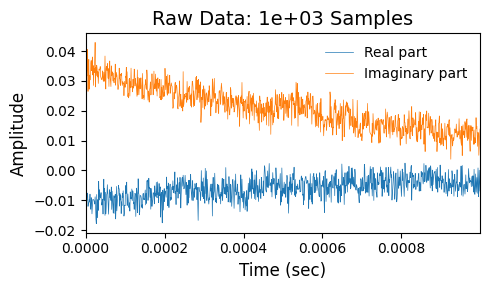

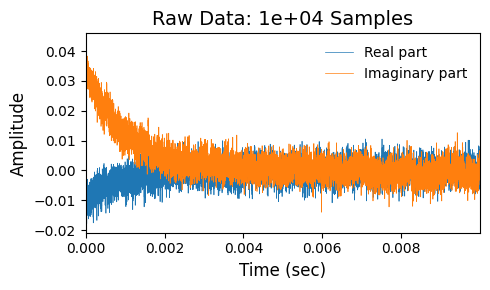

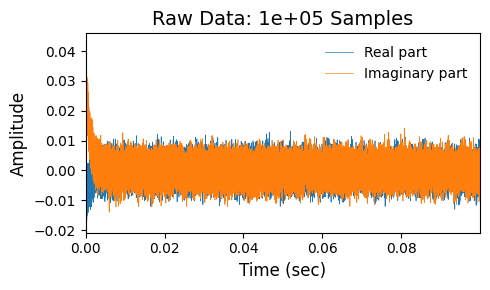

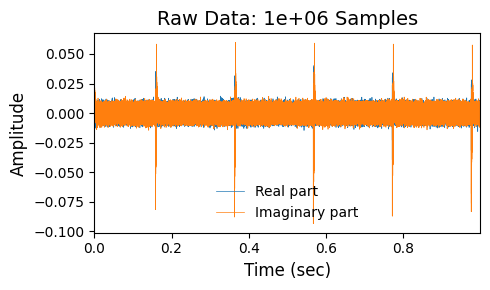

[ERROR] [UHD] An unexpected exception was caught in a task loop.The task loop will now exit, things may not work.EnvironmentError: IOError: usb rx8 transfer status: LIBUSB_TRANSFER_NO_DEVICE


In [ ]:
### figure: Raw data (for first n_show samples)

# n_show = 1000000

for n_show in [1000, 10000, 100000, 1000000]:

    fig,ax = plt.subplots(figsize=(5,3))
    ax.plot(time_arr[:n_show],np.real(samps_data[:n_show]), linewidth=0.5, label='Real part')
    ax.plot(time_arr[:n_show],np.imag(samps_data[:n_show]), linewidth=0.5, label='Imaginary part')
    ax.set_title(f"Raw Data: {n_show:.0e} Samples",fontsize=14)
    ax.set_xbound(0, time_arr[n_show-1])
    ax.set_xlabel('Time (sec)',fontsize=12)
    ax.set_ylabel('Amplitude',fontsize=12)
    ax.legend(frameon=False, fontsize=10, loc="best")
    plt.tight_layout()

    fig1_path = figs_dir + '/raw_data'
    if not os.path.exists(fig1_path):
        os.makedirs(fig1_path)

    plt.savefig(fig1_path+f"/rawdata_first_{n_show:.0f}_samples.pdf", dpi=100, bbox_inches='tight')